In [1]:
import pandas as pd
import os
os.chdir("/home/eric/Nextcloud/Documents/Honors Capstone/nuclear/datasets/Gupta")
#os.listdir(os.getcwd())
df = pd.read_csv("Nuke_Accept_Data.csv",  encoding = 'unicode_escape', engine ='python')
df_date = df.copy()
df_date['date'] = pd.to_datetime([f'{y}-{m}-{d}' for y, m, d in zip(df.year, df.month, df.day)])

# Gupta data set (various years)

## Interesting possible comparisons



## General notes

Not too much to say about this one. Data is very sparse, and there is only one way to interpret this

In [2]:
df['question'].value_counts()

(I'm going to read you a list of proposals for dealing with the energy crisis, and I'd like you to tell me whether you generally favor or oppose each one.)...Building more nuclear power plants                                                                                                                                                                                                                                      37
Overall, do you strongly favor, somewhat favor, somewhat oppose, or strongly oppose the use of nuclear energy as one of the ways to provide electricity in the United States?                                                                                                                                                                                                                                                         20
(As I read some possible government policies to address America's energy supply, tell me whether you would favor or oppose each.) Would you favor or o

In [3]:
print("support mean: ", df_date['support'].mean())
print("oppose mean: ", df_date['oppose'].mean())
print('\n')
print("support median: ", df_date['support'].median())
print("oppose median: ", df_date['oppose'].median())

support mean:  48.86159169550173
oppose mean:  42.42560553633218


support median:  49.0
oppose median:  42.0


In [4]:
#pd.set_option('display.max_colwidth', None)
pd.options.display.max_colwidth = 48
#df2['question']
s= "Do you favor or oppose building more nuclear power plants"
#print(df_date[df_date['question']])
df2 = df_date[df_date['question'].str.contains(s)]
df3 = df2.sort_values(by=['year', 'month', 'day'])
df3

,question,varname,month,day,year,ncases,firm,support,oppose,total,ipoll_link,date
154,Do you favor or oppose building more nuclear...,more.plants,4,11,1991,1000,yankelovich,40,52,92,http://www.ropercenter.uconn.edu/CFIDE/cf/ac...,1991-04-11
151,Do you favor or oppose building more nuclear...,more.plants,3,12,1992,1400,yankelovich,28,64,92,http://www.ropercenter.uconn.edu/CFIDE/cf/ac...,1992-03-12
140,Do you favor or oppose building more nuclear...,more.plants,5,10,2001,900,OD,49,40,89,http://www.ropercenter.uconn.edu/CFIDE/cf/ac...,2001-05-10
51,Do you favor or oppose building more nuclear...,more.plants,3,21,2010,1030,ORC,50,47,96,http://www.ropercenter.uconn.edu/CFIDE/cf/ac...,2010-03-21
38,Do you favor or oppose building more nuclear...,more.plants,3,20,2011,1012,ORC,46,53,99,http://www.ropercenter.uconn.edu/CFIDE/cf/ac...,2011-03-20


In [5]:
print(df['question'])

0      (Do you favor or oppose expanding each of th...
1      Next, I am going to read some specific propo...
2      (For each of the following, please tell me w...
3      (Do you favor or oppose expanding each of th...
4      Overall, do you strongly favor, somewhat fav...
                            ...                       
284    (There has been much talk about the problem ...
285    (Now, here is a list of some specific things...
286    (Now let me read you some suggestions which ...
287    (Now, here is a list of some specific things...
288    (Twice in November, President Nixon addresse...
Name: question, Length: 289, dtype: object


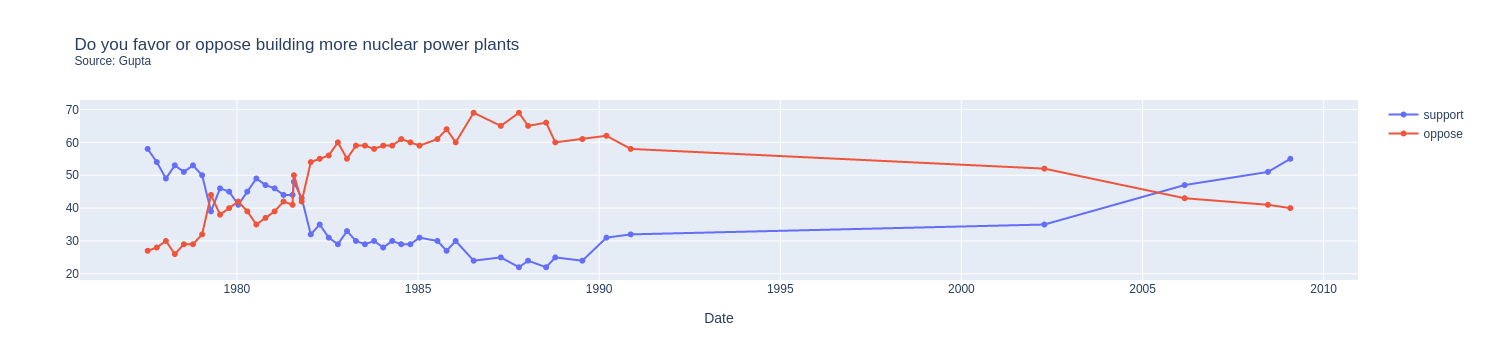

favor: 68 year: 1977
oppose: 76 year: 1987


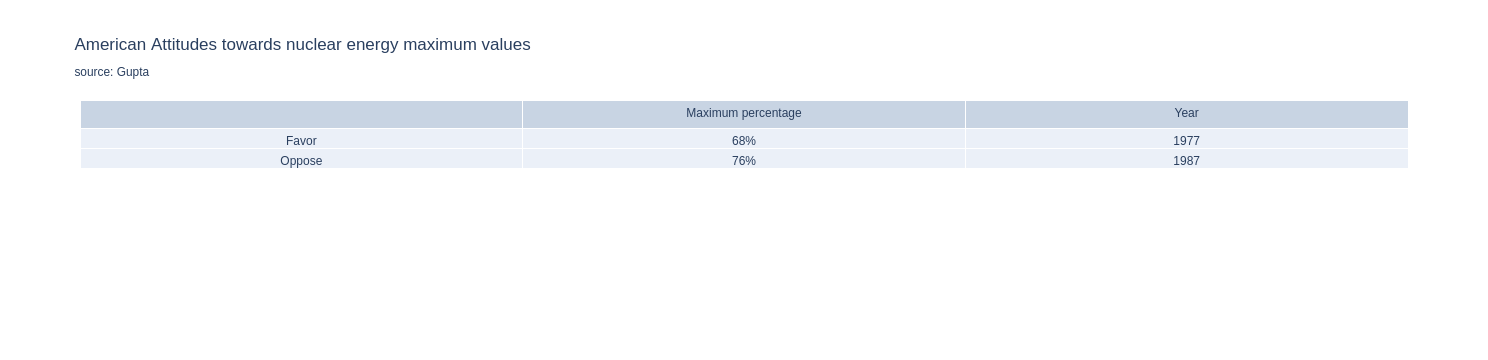

In [79]:
import plotly.express as px
import plotly.graph_objects as go
#type(df3['date'].iloc[1])
s= "Do you favor or oppose building more nuclear power plants"
df4 = df_date.sort_values(by=['date']).copy()
source = df4['firm'].iloc[0].title()
title = s + "<br><sup>Source: " + "Gupta" + "<sup>"

build_more_df = df4.copy()
resultdf=build_more_df.where(build_more_df['question'].str.contains(pat = "Building more nuclear power plants")).dropna().drop(columns='question')
fig_gupta = px.line(resultdf, x="date", y=["support", "oppose"], title=title, markers=True)
fig_gupta.update_layout(yaxis_title="", xaxis_title="Date", legend_title="")
fig.show()
# resultdf
#build_more_df['question'].str.contains(pat = "a")

def calc_percentage(val, total):
    return ((val/total)*100)



def create_table(df):
    fav_max_val = 0
    opp_max_val = 0
    
    for idx, row in df.iterrows():
        #print(f"support: {(row['support']/TOTAL)*100} oppose: {(row['oppose']/TOTAL)*100}")
        if fav_max_val <= calc_percentage(row['support'], row['total']):
            fav_max_val = round(calc_percentage(row['support'], row['total']))
            fav_max_year = row['year']
        if opp_max_val <= calc_percentage(row['oppose'], row['total']):
            opp_max_val = round(calc_percentage(row['oppose'], row['total']))
            opp_max_year = row['year']
    print(f"""favor: {fav_max_val} year: {fav_max_year:.0f}\noppose: {opp_max_val} year: {opp_max_year:.0f}""")

    
    fig = go.Figure(data=[go.Table(header=dict(values=[' ', 'Maximum percentage', 'Year']),
                 cells=dict(values=[["Favor", "Oppose"], [f"{fav_max_val}%", f"{opp_max_val}%"], [fav_max_year, opp_max_year]])
                              )])
    fig.update_layout(title_text="American Attitudes towards nuclear energy maximum values<br><sub>source: Gupta")
    fig.show()
create_table(resultdf)

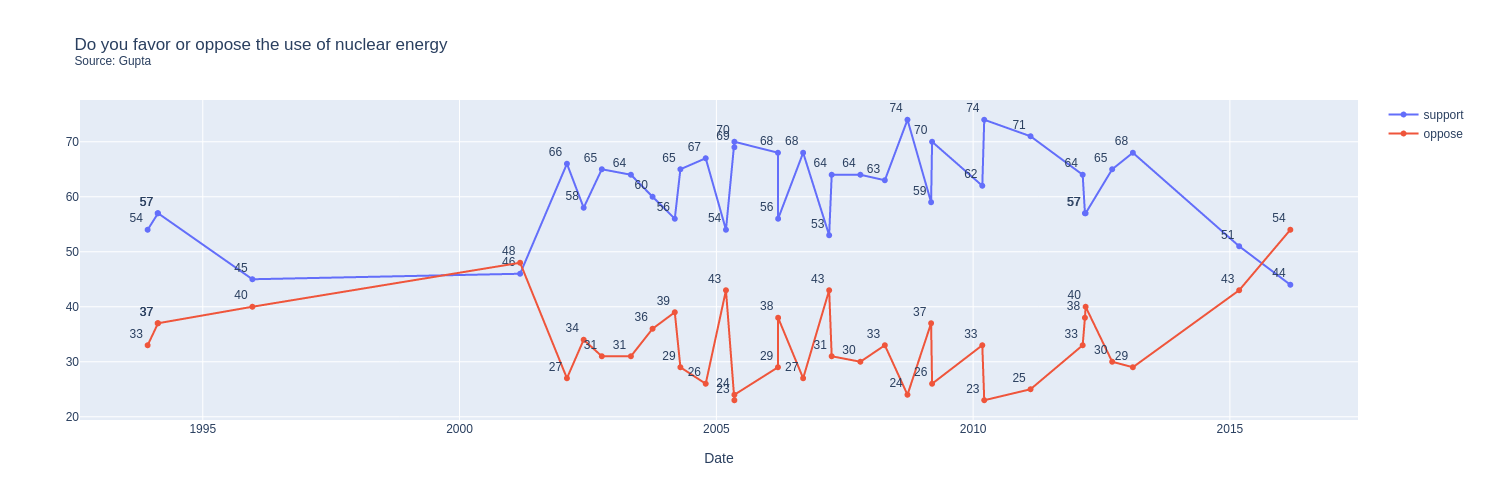

favor: 76 year: 2010
oppose: 55 year: 2016


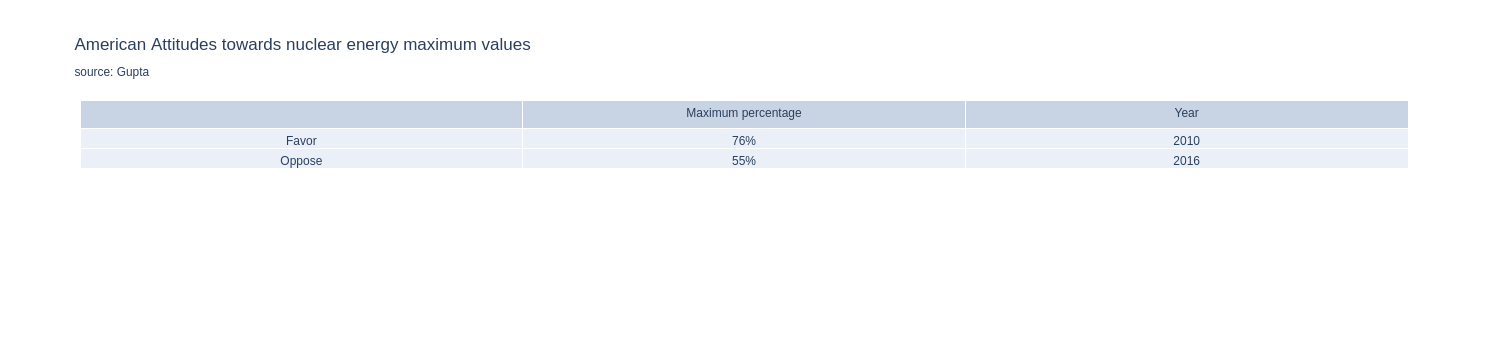

In [84]:
import plotly.express as px
import re
#type(df3['date'].iloc[1])
s= "Do you favor or oppose the use of nuclear energy"
# df4 = df_date.sort_values(by=['date']).copy()
source = df4['firm'].iloc[0].title()
title = s + "<br><sup>Source: " + "Gupta" + "<sup>"

support_df = df4.copy()
resultdf2=support_df.where(support_df['question'].str.contains(pat = "Overall, do you .* the use of nuclear.*", regex=True)).dropna().drop(columns='question')
fig_gupta_use = px.line(resultdf2, x="date", y=["support", "oppose"], title=title, markers=True, text="value", height=500)
fig_gupta_use.update_layout(yaxis_title="", xaxis_title="Date", legend_title="",)
fig_gupta_use.update_traces(textposition="top left")
fig_gupta_use.show()
# resultdf
#build_more_df['question'].str.contains(pat = "a")
create_table(resultdf2)

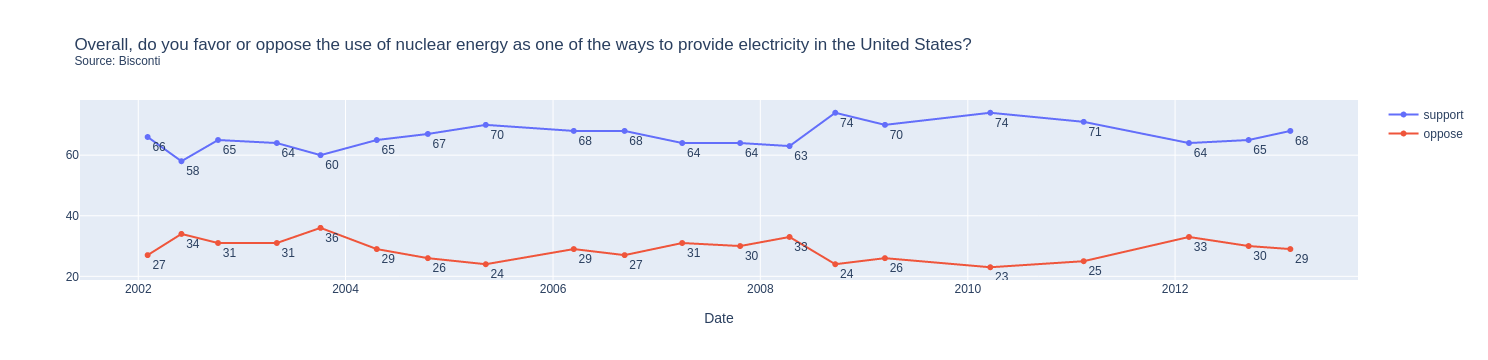

favor: 76 year: 2010
oppose: 38 year: 2003


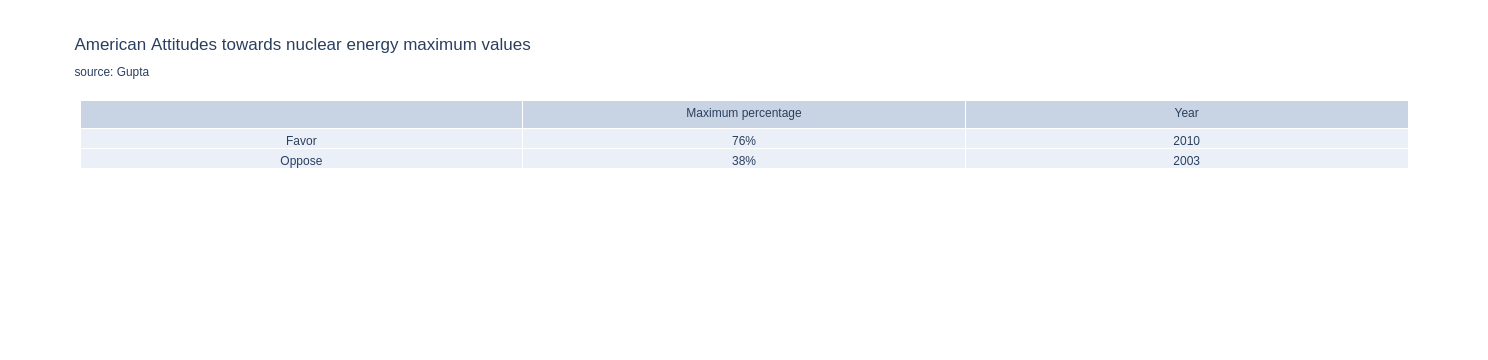

In [85]:
s2 = "Overall, do you strongly favor, somewhat favor, somewhat oppose, or strongly oppose the use of nuclear energy as one of the ways to provide electricity in the United States?"
# Change the question to reflect the results
s2_alt = "Overall, do you favor or oppose the use of nuclear energy as one of the ways to provide electricity in the United States?"
df5 = df_date[df_date['question'].str.contains(s2)]
df6 = df5.sort_values(by=['date'])
source = df6['firm'].iloc[0].title()
title = s2_alt + "<br><sup>Source: " + source + "<sup>"
fig_bis_use = px.line(df6, x="date", y=["support", "oppose"], title=title, markers=True, text="value")
fig_bis_use.update_layout(yaxis_title="", xaxis_title="Date", legend_title="")
fig_bis_use.update_traces(textposition="bottom right")
fig_bis_use.show()

create_table(df6)

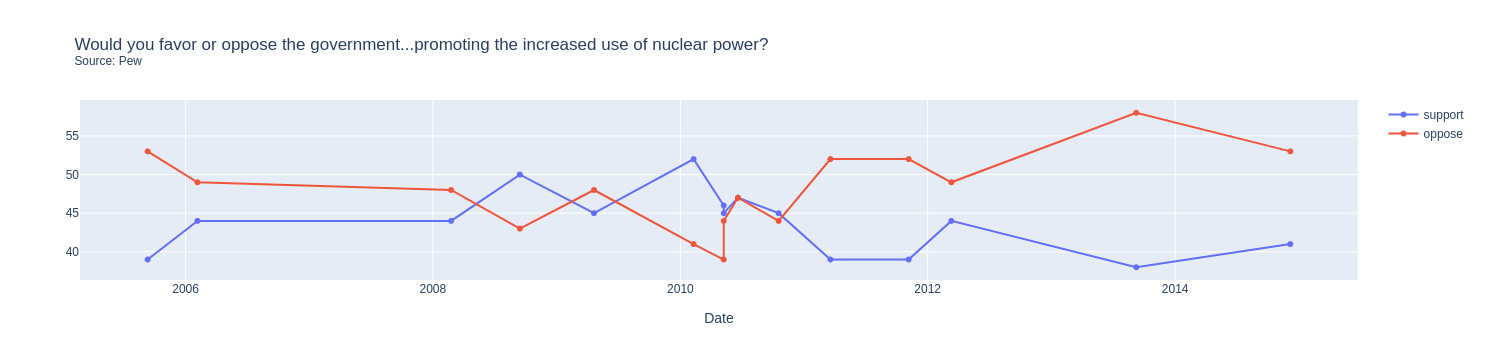

favor: 56 year: 2010
oppose: 60 year: 2013


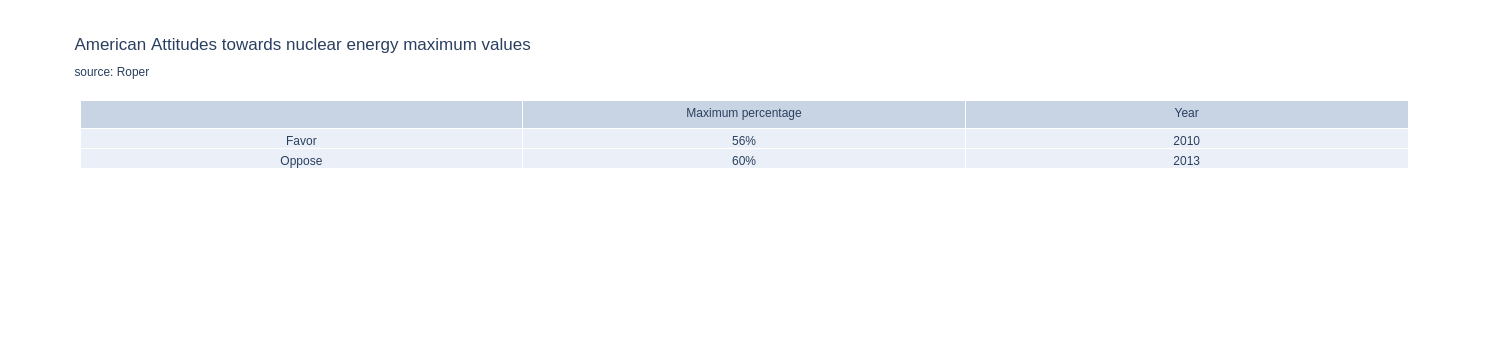

In [9]:
s3 = r"As I read some possible government policies to address America's energy supply, tell me whether you would favor or oppose each.\) Would you favor or oppose the government...promoting the increased use of nuclear power?"
s3_short = r"Would you favor or oppose the government...promoting the increased use of nuclear power?"
df7 = df_date[df_date['question'].str.contains(s3)]
df7 = df7.sort_values(by=['date'])
source = df7['firm'].iloc[0].title()
title = s3_short + "<br><sup>Source: " + source + "<sup>"
fig = px.line(df7, x="date", y=["support", "oppose"], title=title, markers=True)
fig.update_layout(yaxis_title="", xaxis_title="Date", legend_title="")
fig.show()

create_table(df7)

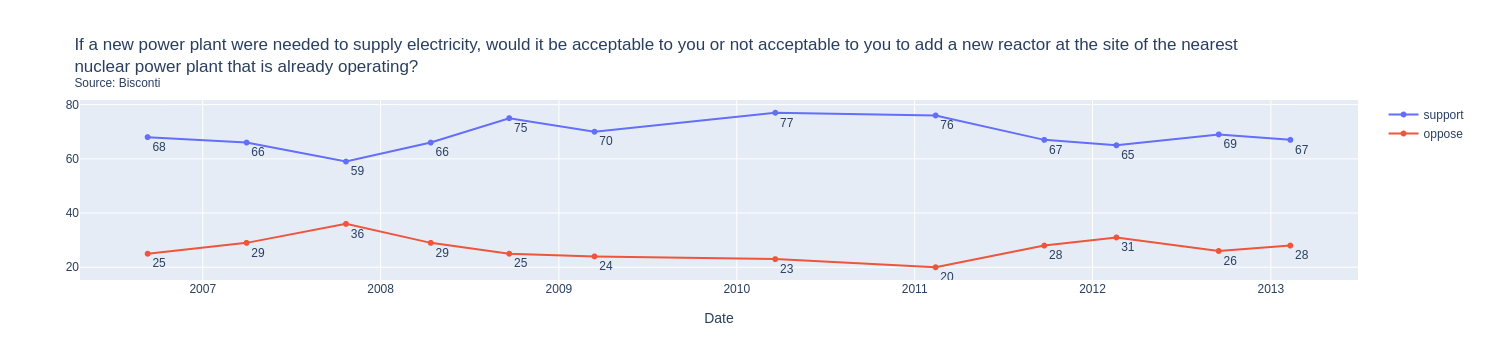

In [57]:
s4 = r"If a new power plant were needed to supply electricity, would it be acceptable to you or not acceptable to you to add a new reactor at the site of the nearest nuclear power plant that is already operating?"
s4_short = """If a new power plant were needed to supply electricity, would it be acceptable to you or not acceptable to you to add a new reactor at the site of the nearest<br>nuclear power plant that is already operating?"""
df8 = df_date[df_date['question'].str.contains(s4)]
df8 = df8.sort_values(by=['date'])
source = df8['firm'].iloc[0].title()
title = s4_short + "<br><sup>Source: " + source + "<sup>"
fig = px.line(df8, x="date", y=["support", "oppose"], title=title, markers=True, text="value")
fig.update_layout(yaxis_title="", xaxis_title="Date", legend_title="")
fig.update_traces(textposition="bottom right")
# fig.show()

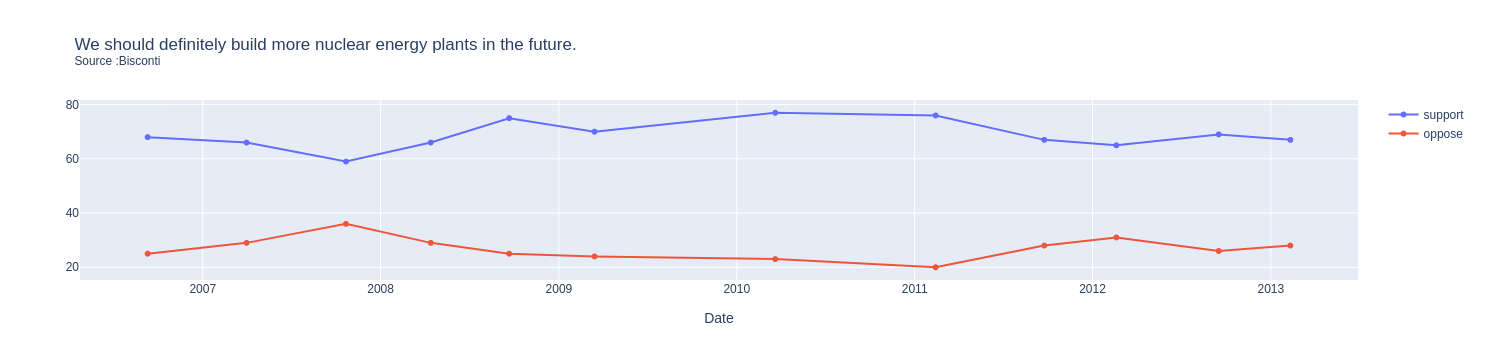

In [80]:
s5 = "We should definitely build more nuclear energy plants in the future."
df9 = df_date[df_date['question'].str.contains(s4)]
df9 = df9.sort_values(by=['date'])
source = df9['firm'].iloc[0].title()
title = s5 + "<br><sup>Source :" + source + "<sup>"
fig_bis = px.line(df9, x="date", y=["support", "oppose"], title=title, markers=True)
fig_bis.update_layout(yaxis_title="", xaxis_title="Date", legend_title="")
# fig.show()

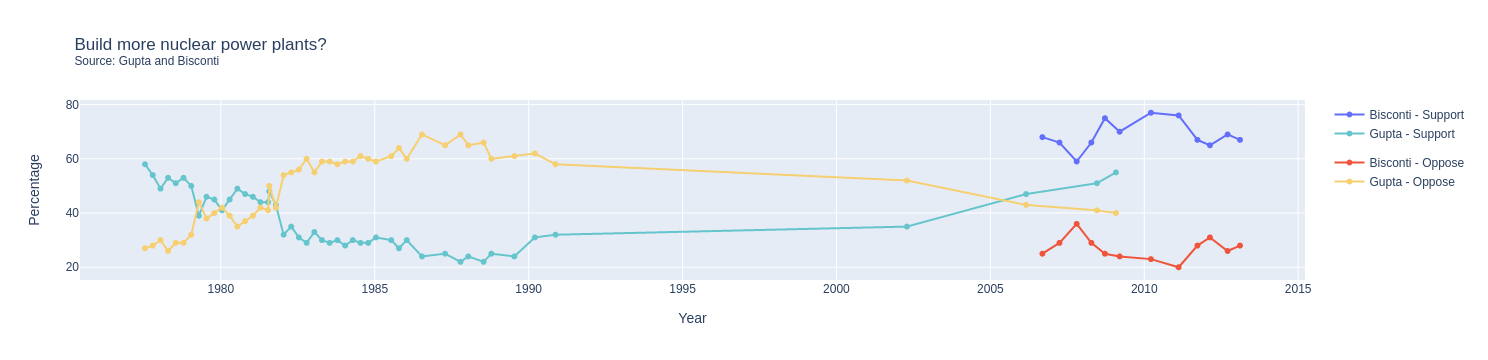

In [159]:
# fig_bis.update_layout()
fig_bis['data'][0]['name'] = "Bisconti - Support"
fig_bis['data'][1]['name'] = "Bisconti - Oppose"
fig_gupta = px.line(resultdf, x="date", y=["support", "oppose"], title=title, markers=True, color_discrete_sequence=px.colors.qualitative.Pastel)
fig_gupta['data'][0]['name'] = "Gupta - Support"
fig_gupta['data'][1]['name'] = "Gupta - Oppose"

fig3 = go.Figure(data=fig_bis.data + fig_gupta.data)
title= "Build more nuclear power plants?" + "<br><sup>Source: " + "Gupta and Bisconti" + "<sup>"
fig3.update_layout(title=title, yaxis_title="Percentage", xaxis_title="Year")
fig3.show()

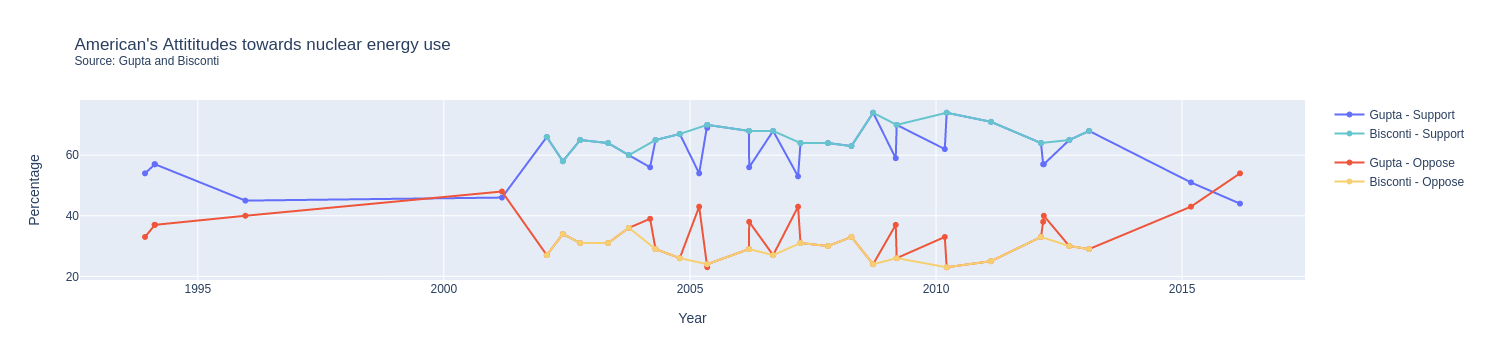

['#636EFA', '#EF553B', '#00CC96', '#AB63FA']


In [155]:
fig_bis_use = px.line(df6, x="date", y=["support", "oppose"], title=title, markers=True, color_discrete_sequence=px.colors.qualitative.Pastel)
fig_bis_use['data'][0]['name'] = "Bisconti - Support"
fig_bis_use['data'][1]['name'] = "Bisconti - Oppose"
# fig_bis_use.show()

fig_gupta_use.update_traces(text="")
fig_gupta_use['data'][0]['name'] = "Gupta - Support"
fig_gupta_use['data'][1]['name'] = "Gupta - Oppose"
# fig_gupta_use.show()

fig_use = go.Figure(data=fig_gupta_use.data + fig_bis_use.data)
title = "American's Attititudes towards nuclear energy use" + "<br><sup>Source: " + "Gupta and Bisconti" + "<sup>"
fig_use.update_layout(title=title, yaxis_title="Percentage", xaxis_title="Year")
fig_use.show()
print(px.colors.qualitative.Plotly[:4])

In [12]:
# resultdf
# resultdf2
# df6 
# df9 
import numpy as np

mean_df = pd.concat([resultdf, resultdf2, df6, df9], ignore_index=True)

mean_support = [calc_percentage(row['support'], row['total']) for idx, row in mean_df.iterrows()]

print(np.mean(mean_support))
print(np.median(mean_support))
print('\n')

print(100 - np.mean(mean_support))
print(100 - np.median(mean_support))


57.490762641322114
62.30263157894737


42.509237358677886
37.69736842105263


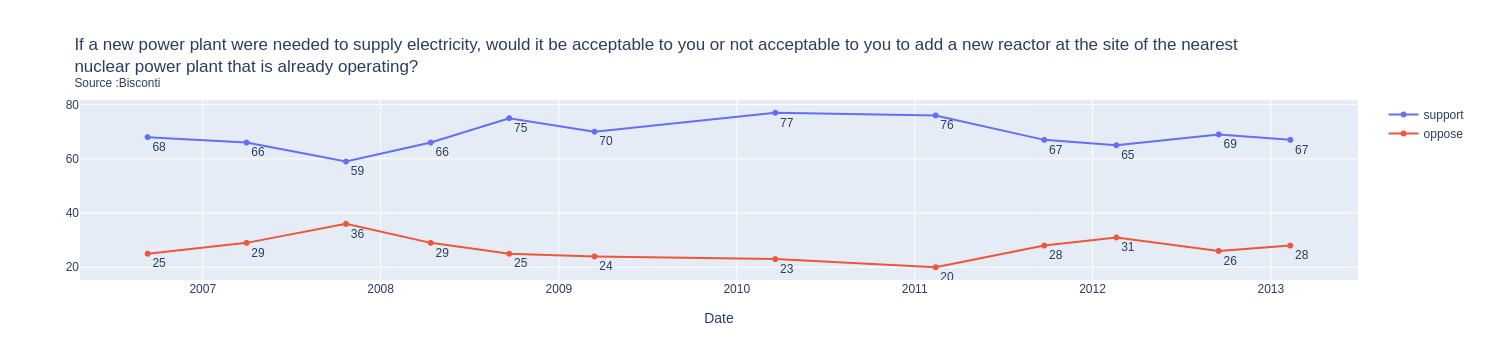

In [54]:
fig = px.line(df9, x="date", y=["support", "oppose"], title=title, markers=True, text="value")
fig.update_layout(yaxis_title="", xaxis_title="Date", legend_title="")
fig.update_traces(textposition="bottom right")
fig.show()
# df9['question'].head()